# ECA

## **Question 1: List the categorical and numeric variables in this dataset.**

#### Load the Dataset and import libraries

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

raw_df = pd.read_csv("ECA_data.csv")
raw_df.shape

(18769, 24)

#### Checking the columns and their features

In [422]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18769 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18769 non-null  int64  
 1   LIMIT      18769 non-null  int64  
 2   BALANCE    18769 non-null  float64
 3   INCOME     18769 non-null  int64  
 4   RATING     18769 non-null  int64  
 5   GENDER     18769 non-null  int64  
 6   EDUCATION  18756 non-null  float64
 7   MARITAL    18731 non-null  float64
 8   AGE        18769 non-null  int64  
 9   S1         18769 non-null  int64  
 10  S2         18769 non-null  int64  
 11  S3         18769 non-null  int64  
 12  S4         18769 non-null  int64  
 13  S5         18769 non-null  int64  
 14  B1         18769 non-null  int64  
 15  B2         18769 non-null  int64  
 16  B3         18769 non-null  int64  
 17  B4         18769 non-null  int64  
 18  B5         18769 non-null  int64  
 19  R1         18769 non-null  int64  
 20  R2    

#### Hence we can see that we have 23 variables or features. Out of these although all of them are either float or int type. We can still differentiate based on the understanding of data that we have due to the appendix. Hence:

#### Categorical:    GENDER, EDUCATION, MARITAL, RATING
#### Numerical:      ID, LIMIT, BALANCE, INCOME, AGE, B(n), R(n)

#### While S(n) has features of both Categorical and Numerical data since it can be categorical because of 3 categories: Prompt Payment, Minimum Sum Payment, Delayed payment for x month(s). However, the Delayed payment for x month(s) is itself a numerical category. Hence the S(n) will be classified as a categorical data which can have numerical data inside it!

##  **Question 2: Conduct four (4) data pre-processing tasks for the analysis of the data, explaining results obtained.**

We can note that categorical features are already taken care of by Label encoding, Hence, we do not need to handle that.

## *1. Handling of Missing Data*

In [423]:
#Checking how many missing values are in each variable column
raw_df.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

Since the missing data records are very less compared to the total record in the data set and they are only missing in 'EDUCATION' & 'MARITAL' feature, we can replace them without too much distortion to the data set. It will be useful to use mode to replace these missing values since they are categorical features.

In [424]:
raw_df['EDUCATION'].mode()[0]

2.0

In [425]:
raw_df['EDUCATION'] = raw_df['EDUCATION'].fillna(raw_df['EDUCATION'].mode()[0])
raw_df['MARITAL'] = raw_df['MARITAL'].fillna(raw_df['MARITAL'].mode()[0])
raw_df.isnull().sum()

ID           0
LIMIT        0
BALANCE      0
INCOME       0
RATING       0
GENDER       0
EDUCATION    0
MARITAL      0
AGE          0
S1           0
S2           0
S3           0
S4           0
S5           0
B1           0
B2           0
B3           0
B4           0
B5           0
R1           0
R2           0
R3           0
R4           0
R5           0
dtype: int64

In [426]:
raw_df.head()

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.00,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.05,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.85,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.30,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.25,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691


During the data analysis, missing values should be taken into account. You can see that the mode value of the corresponding columns, which had missing values, have been used to fill in the missing data in this particular step. We use mode because of categorical data being used, Mean is, hence, not useful.

## *2. Handling of Data Types*

In [427]:
#Since 'EDUCATION' & 'MARITAL' are categorical features which can only take integer values, lets change their type to int64 from float64 first.
raw_df['EDUCATION'] = raw_df['EDUCATION'].astype('int64')
raw_df['MARITAL'] = raw_df['MARITAL'].astype('int64')
print(raw_df.dtypes)

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION      int64
MARITAL        int64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object


As we can see here that 'EDUCATION' variable column is a float64 data type (decimal). This means that instead of having the full rounded number which signifies the category, we will have 55.0. We don't really need this decimal number. Without this decimal point, the data analysis and plotting will be more understandable and easier to visualize.
We can use the same logic with 'MARITAL' variable columns as well since they represent a categorical data as well. Decimals are not needed!

In [428]:
#Since 'R3' is saved as an Object while all other Rn are saved as int64, We better change it's data type to int64 as well for consistency and ease of use later on!

#Some values in 'R3' contain the dollar sign! Data is corrupted, we cannot change this string to int64, so let's remove these rows!
rows = []
for i in range(0,len(raw_df)):
    row_str = raw_df['R3'][i]
    if("$" in row_str):
        rows.append(i)

raw_df.drop(labels=rows,axis=0,inplace=True)
raw_df['R3'] = pd.to_numeric(raw_df['R3'])
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18759 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18759 non-null  int64  
 1   LIMIT      18759 non-null  int64  
 2   BALANCE    18759 non-null  float64
 3   INCOME     18759 non-null  int64  
 4   RATING     18759 non-null  int64  
 5   GENDER     18759 non-null  int64  
 6   EDUCATION  18759 non-null  int64  
 7   MARITAL    18759 non-null  int64  
 8   AGE        18759 non-null  int64  
 9   S1         18759 non-null  int64  
 10  S2         18759 non-null  int64  
 11  S3         18759 non-null  int64  
 12  S4         18759 non-null  int64  
 13  S5         18759 non-null  int64  
 14  B1         18759 non-null  int64  
 15  B2         18759 non-null  int64  
 16  B3         18759 non-null  int64  
 17  B4         18759 non-null  int64  
 18  B5         18759 non-null  int64  
 19  R1         18759 non-null  int64  
 20  R2    

We noted an interesting observation that 'R3' had a datatype of 'str' however all other R's (Rn) had a datatype of int64. Therefore, to maintain consistency we have to change 'R3' datatype to int64 as well. However, We run into a problem where 'R3' has a few values in it that are preceded with a '$' sign this does not allow us to directly change the datatype. Therefore, We identify these rows and remove them from our dataset since they are only a few.

## *3. Reducing noisy data*

In [429]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18759.0,9386.090197,5416.819788,1.0,4697.5,9387.000,14076.5000,18766.00
LIMIT,18759.0,168291.682926,129430.036006,10000.0,50000.0,140000.000,240000.0000,800000.00
BALANCE,18759.0,9119.713486,13045.937042,0.0,641.2,3960.075,11974.8125,130692.45
INCOME,18759.0,177778.025694,143119.955942,10000.0,56475.5,148225.000,256900.0000,908846.00
RATING,18759.0,0.219255,0.413753,0.0,0.0,0.000,0.0000,1.00
GENDER,18759.0,0.618210,0.485838,0.0,0.0,1.000,1.0000,1.00
EDUCATION,18759.0,1.790127,0.732136,0.0,1.0,2.000,2.0000,3.00
MARITAL,18759.0,1.515859,0.519532,0.0,1.0,2.000,2.0000,2.00
AGE,18759.0,35.579828,9.556846,-1.0,28.0,34.000,41.0000,199.00
S1,18759.0,0.129005,0.954890,-1.0,0.0,0.000,0.0000,7.00


We can note here that although we have some skewed data in the terms of LIMIT, BALANCE, INCOME, It can be normal of a real life situation of uneven distribution of wealth. However, Age is a clear and obvious example of noisy data where AGE is ranging from -1 to 199. We can try to fix this with outlier detection using IQR.

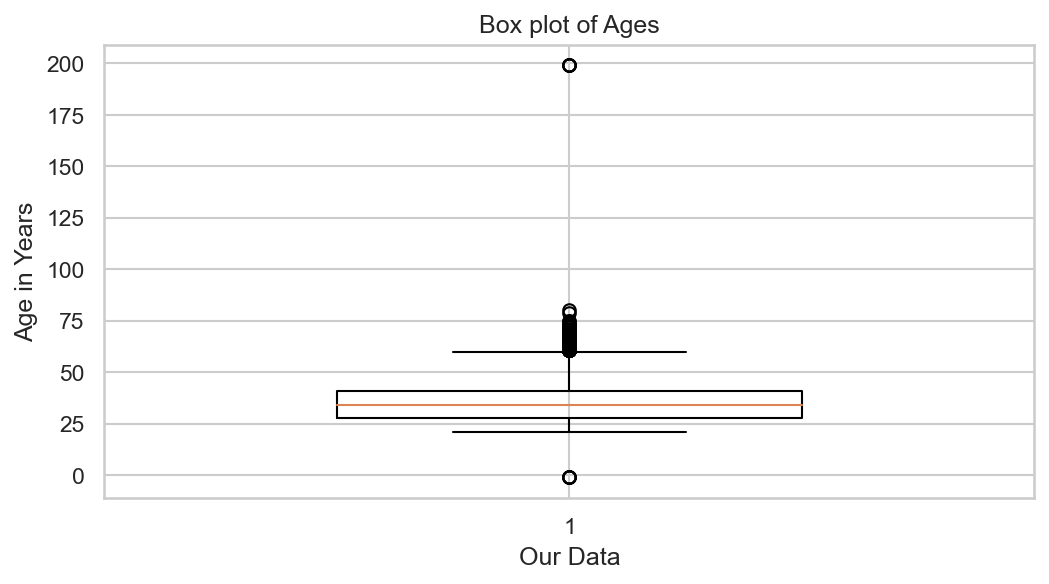

In [430]:
fig = plt.figure(figsize=(8,4))
plt.boxplot([raw_df.AGE], widths=0.5)
plt.title('Box plot of Ages')
plt.xlabel('Our Data')
plt.ylabel('Age in Years')
plt.show()


In [431]:
def REM_OUTLIERS(df,col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1 #Interquartile range
    MIN  = Q1 - 1.5 * IQR
    MAX =  Q3 + 1.5 * IQR
    df_out = df.loc[(df[col_name] > MIN) & (df[col_name] < MAX)]
    return df_out

df = REM_OUTLIERS(raw_df,'AGE')
print(df.shape)
df.describe().T

(18586, 24)


,count,mean,std,min,25%,50%,75%,max
ID,18586.0,9388.643065,5416.367763,1.0,4701.2500,9395.5000,14085.75,18766.00
LIMIT,18586.0,167915.295384,129187.961607,10000.0,50000.0000,140000.0000,240000.00,800000.00
BALANCE,18586.0,9084.147689,12957.461534,0.0,646.1875,3961.7375,11943.75,130692.45
INCOME,18586.0,177381.298181,142875.520971,10000.0,56402.5000,147717.0000,256389.75,908846.00
RATING,18586.0,0.218982,0.413568,0.0,0.0000,0.0000,0.00,1.00
GENDER,18586.0,0.619606,0.485497,0.0,0.0000,1.0000,1.00,1.00
EDUCATION,18586.0,1.787313,0.730306,0.0,1.0000,2.0000,2.00,3.00
MARITAL,18586.0,1.519316,0.519285,0.0,1.0000,2.0000,2.00,2.00
AGE,18586.0,35.293016,8.784057,21.0,28.0000,34.0000,41.00,60.00
S1,18586.0,0.128269,0.953879,-1.0,0.0000,0.0000,0.00,7.00


Looking at the box plot of AGE variable column, It is obvious that he data has some significant outliers and noisy data that can distort our results significantly, Hence, we need to do some pre-processing to take care of it.

## *4. Data Discretisation*

In [432]:
df['age_by_decade'] = pd.cut(x=df['AGE'], bins=[20, 29, 39, 49, 60], labels=['20s', '30s', '40s','50s'])
df.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_26112\3881538811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_by_decade'] = pd.cut(x=df['AGE'], bins=[20, 29, 39, 49, 60], labels=['20s', '30s', '40s','50s'])


,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B2,B3,B4,B5,R1,R2,R3,R4,R5,age_by_decade
0,1,210000,0.00,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0,0,30s
1,2,260000,10928.05,278481,0,0,2,2,31,0,...,46407,38874,31324,24031,2000,2000,2000,2000,72000,30s
2,3,400000,65397.85,431993,0,0,3,1,51,0,...,352484,338823,283288,185288,15000,14000,11500,8000,7000,50s
3,4,20000,3695.30,22368,0,0,2,1,58,-1,...,200,0,28740,1295,0,0,28740,1565,0,50s
4,5,180000,68.25,166900,0,1,2,1,42,0,...,598,2056,4300,1802,598,2056,4300,1802,3691,40s


Discretisation of the AGE column and making it into a categorical variable will make our data analysis easier to visualize and understand. We can do Data Discretisation on this column variable and add age_by_decade column for future visualizations.

## *5. Splitting the dataset into the training and test sets*

In [433]:
from sklearn.model_selection import train_test_split
x_ind= df.drop(['B1'],axis=1).values
y_dep = df['B1'].values
xtrain, xtest, ytrain, ytest = train_test_split(x_ind, y_dep, test_size = 0.25,random_state= 1)

Any algorithm for machine learning needs to pass accuracy tests. To do that, we divide our data set into a training set and a testing set. Here, we consider that the training set makes up 75% of the original data set and the testing set makes up 25%.

##  **Question 3: Articulate five (5) relevant insights of the data, with supporting visualization for each insight.**

## *1. Average Income per Age Decade*

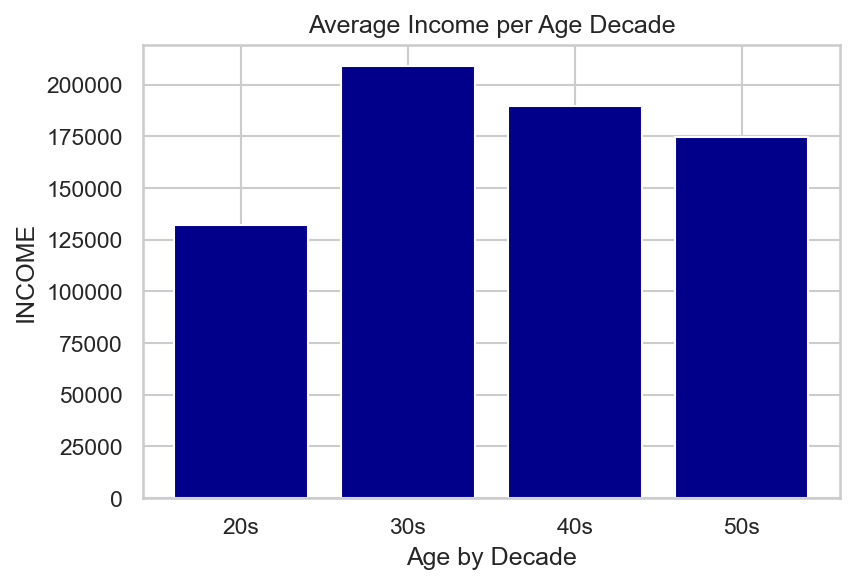

In [434]:
labels = ['20s', '30s', '40s','50s']
mean_per_decade = []
for age_dec in labels:
    sub_df = df.loc[df['age_by_decade'] == age_dec]  #Keep Only current decade population
    curr_mean = sub_df['INCOME'].mean()
    mean_per_decade.append(curr_mean)

plt.bar(labels, mean_per_decade, color ='darkblue')
plt.xlabel("Age by Decade")
plt.ylabel("INCOME")
plt.title("Average Income per Age Decade")
plt.show()

#### By looking at this data, First essential thing to analyse was the Customer current income relation to the Age of the Customer. This was seen clearly by the help of binning the numerical variable age before. Due to that, we can categorize the age variable into each decade of age and visualise which decade has how much average income from the dataset. In our visualization we can see that 20s or entry level, young employees or customers have a low average income. However, It increases sharply in the next decade of 30s where the average employee is more experienced and energized. The visualization of the data shows a steep increase in the average income hitting a maximum average point in the 30s. From 30s onward to 40s and 50s there is a slight but steady decrease in the average income for the customers. This helps us really understand the trend of income for our customers, essentially helping us decide which age group is most likely to be a credible customer meaning that he is more likely to have a good repayment history.

[Text(0.5, 1.0, 'Average Income per Age Decade')]

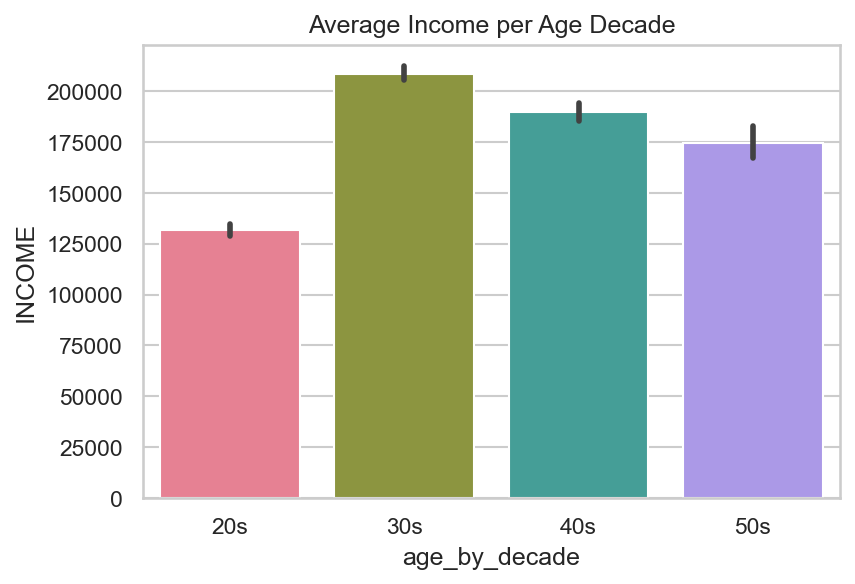

In [435]:
#Plotting the same histogram with seaborn! 
import seaborn as sns

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_theme(style="whitegrid")
sns.barplot(x='age_by_decade', y='INCOME', data=df, estimator=np.mean, palette="husl").set(title='Average Income per Age Decade')

## *2. Income per Marital Status*

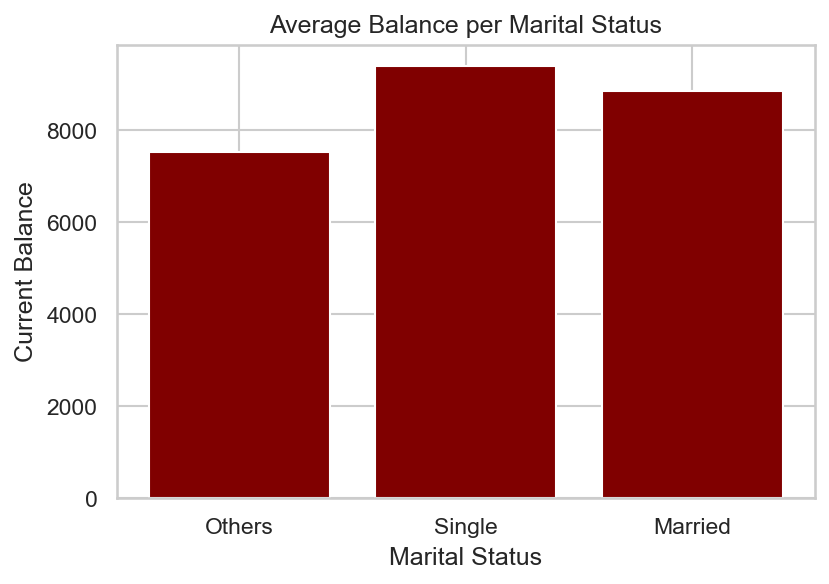

In [436]:
labels = [0, 1, 2]
marital_statuses = ["Others","Single","Married"]
mean_per_status = []
for status in labels:
    sub_df = df.loc[df['MARITAL'] == status]  #Keep Only current marital status population
    curr_mean = sub_df['BALANCE'].mean()
    mean_per_status.append(curr_mean)

plt.bar(marital_statuses, mean_per_status, color ='maroon')
plt.xlabel("Marital Status")
plt.ylabel("Current Balance")
plt.title("Average Balance per Marital Status")
plt.show()

#### For understanding the data and feature correlation to fully understand whether a customer profile will be a credible customer. We can analyse our current data to check their marital status against the balance they have to understand how likely they are to run out of finances. This also help us understand when they have a maximum of savings. This once analysed with the data of repayments amount, repayment status, and customer ratings can help us grasp the validity of a customer. This data suggests slightly that customers with Marital Status of 'Single' are mostly a good bet for credit since they are not susceptible to any large emergency funds. However, An interesting observation here can be the fact that customers with Marital Status of 'others' have the lowest current balance in their credit on average. This combined with other features can help us detect whether a customer can maintain good credit scores.

## *3. Balance per Age Decade*

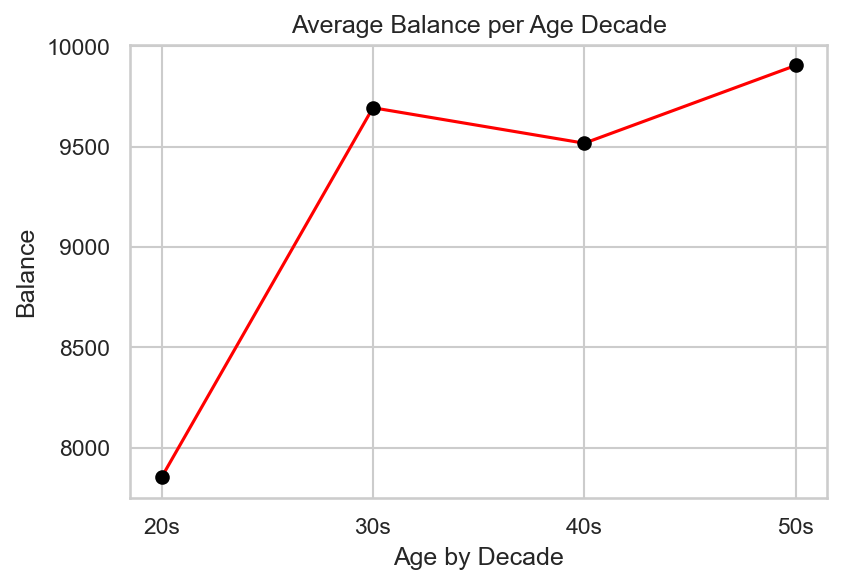

In [437]:
labels = ['20s', '30s', '40s','50s']
limit_per_decade = []
for age_dec in labels:
    sub_df = df.loc[df['age_by_decade'] == age_dec]  #Keep Only current decade population
    curr_mean = sub_df['BALANCE'].mean()
    limit_per_decade.append(curr_mean)

plt.plot(labels, limit_per_decade, color ='red', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.xlabel("Age by Decade")
plt.ylabel("Balance")
plt.title("Average Balance per Age Decade")
plt.show()

#### This is a highly interesting insight for me because of the implications it can have. Firstly, with no surprises at all, The 20s age group has the least amount of current credit balance because of low income and such factors. However, Customers see a very sharp spike towards their 30s when their average credit balance increases a lot. This can be related to the increase in the income of the customers. This really puts the age group of 30s as an easy to go zone for credit score and loans. Since there is an increased stability of finances. Further, We see a slight decrease in 40s in Current Balance on average, This can be related to multiple factors such as family expenses, investments etc. This, hence, is not something to worry about greatly. Keeping in touch with our intuition, the data also further suggests that current credit balance will reach its highest in the 50s when customers are nearing their retirement.

## *4. Education vs Income*

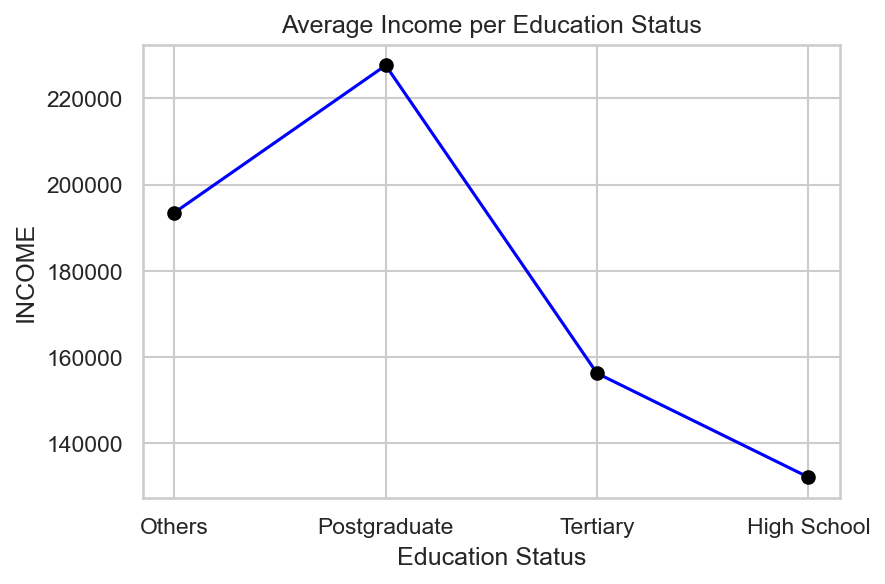

In [438]:
labels = [0, 1, 2, 3]
edu_statuses = ["Others","Postgraduate","Tertiary", "High School"]
mean_per_edu = []
for status in labels:
    sub_df = df.loc[df['EDUCATION'] == status]  #Keep Only current marital status population
    curr_mean = sub_df['INCOME'].mean()
    mean_per_edu.append(curr_mean)

plt.plot(edu_statuses, mean_per_edu, color ='blue', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.xlabel("Education Status")
plt.ylabel("INCOME")
plt.title("Average Income per Education Status")
plt.show()


#### Perhaps this is the most easy to understand visualization based on intuition. This relates the Education Status of the customers to their average income. This can help us understand whether the education status makes a significant difference in the available finances to a customer and their ability to do their payments on time. As we could have guessed, Postgraduates earn the most by a significant amount followed by Others, Tertiary and then High School. The pattern is obvious to note here, However, The 'Other' education status is an interesting one to note and suggests that out of the ordinary education statuses that are classified as 'others' should not be dismissed so easily. They should be taken into consideration since they have the financial means for their repayments.

## *5. Rating vs Credit Limit*

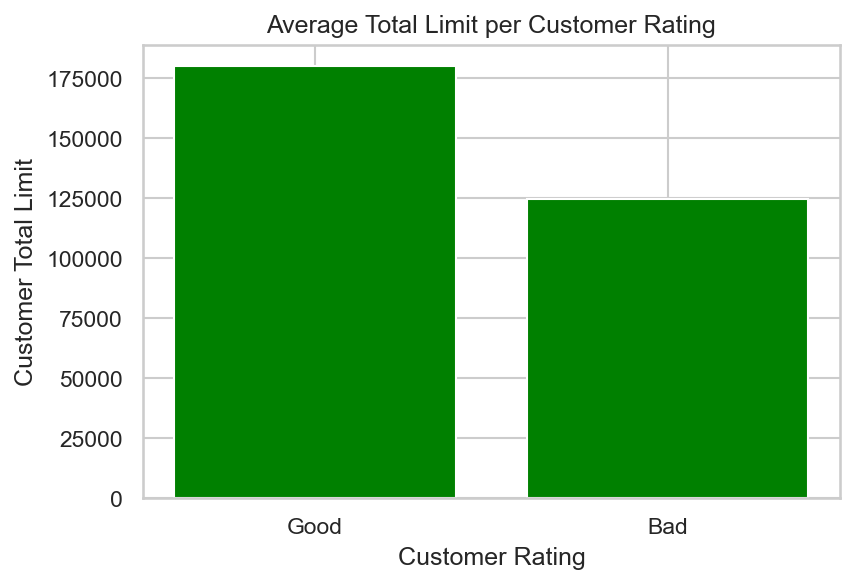

In [439]:
labels = [0, 1]
ratings = ["Good","Bad"]
mean_per_rating = []
for status in labels:
    sub_df = df.loc[df['RATING'] == status] 
    curr_mean = sub_df['LIMIT'].mean()
    mean_per_rating.append(curr_mean)

plt.bar(ratings, mean_per_rating, color ='green')
plt.xlabel("Customer Rating")
plt.ylabel("Customer Total Limit")
plt.title("Average Total Limit per Customer Rating")
plt.show()




The last thing i wanted to get the insight on from the data was whether there was a relation between the Total Limit provided to a customer and their Rating of Good & Bad. As seen from the data and the visualisation, We can note a strong correlation because when the Customer was Rated 'Bad' he had an usually low Total Limit for a customer and vice versa for a 'Good' rated customer. This bar graph of the Average Limit in Total provided to a Customer based on their Customer Rating provides this insight in a clear and apparent way.

[Text(0.5, 1.0, 'LIMIT FOR EACH GENDER, SEPERATED BY RATING')]

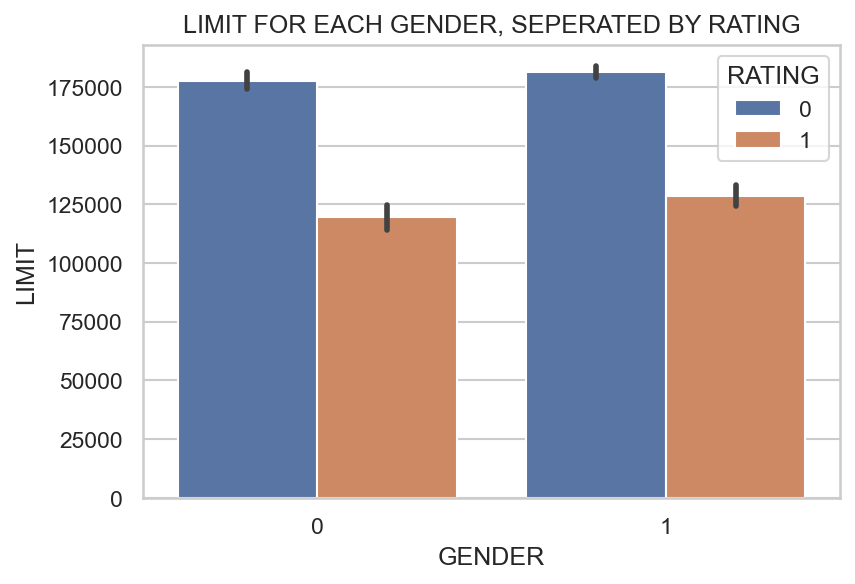

In [440]:
#Additional plot for visualisation using seaborn, 0 - Male, 1 - Female. Blue - Good, Brown - Bad.
sns.barplot(x='GENDER', y='LIMIT', data=df, estimator=np.mean, hue="RATING").set(title='LIMIT FOR EACH GENDER, SEPERATED BY RATING')

##  **Question 4: Perform linear regression modelling to predict the variable, B1, explaining the approach taken, including any further data pre-processing.**

## *1. Removing Redundancy*

Firstly, Since Age and Age_by_decade are giving us the same type of information, We can take out one of these columns from our dataset.

In [441]:
df.drop('age_by_decade', axis=1, inplace=True)
df.columns

C:\Users\Hp\AppData\Local\Temp\ipykernel_26112\2643383276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('age_by_decade', axis=1, inplace=True)


Index(['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION',
       'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'R1', 'R2', 'R3', 'R4', 'R5'],
      dtype='object')

## *2. Feature Scaling or Normalization*

As we can see that we have three features AGE, INCOME, and LIMIT that contains numerical numbers. And these are not on the same scale since, AGE is ranging from 21 to 60, While LIMIT is ranging from 10000 to 800000. Similarly, INCOME is ranging from 10000 to 908846. In order to work with values on the same scale, and larger values not dominating the model producing a bias, we must scale the features.

In [442]:
from sklearn import preprocessing
columns = df.columns
print(columns)
numvar_list = ['AGE','INCOME','LIMIT']
df_ToNorm = df[numvar_list]
df_ToNorm_col = list(df_ToNorm.columns.values)
df_ToNorm_rows = list(df_ToNorm.index)

df_norm = preprocessing.normalize(df_ToNorm)
df_model_scaled = pd.DataFrame(df_norm, columns = df_ToNorm_col, index = df_ToNorm_rows)
df_model_scaled

df_model_scaled = df_model_scaled.add_suffix("_norm")
norm_col_names = df_model_scaled.columns.values
df_final = pd.concat([df, df_model_scaled],axis=1)
df_final

Index(['ID', 'LIMIT', 'BALANCE', 'INCOME', 'RATING', 'GENDER', 'EDUCATION',
       'MARITAL', 'AGE', 'S1', 'S2', 'S3', 'S4', 'S5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'R1', 'R2', 'R3', 'R4', 'R5'],
      dtype='object')


,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B4,B5,R1,R2,R3,R4,R5,AGE_norm,INCOME_norm,LIMIT_norm
0,1,210000,0.000,235822,1,1,1,2,30,0,...,0,0,0,0,0,0,0,0.000095,0.746811,0.665037
1,2,260000,10928.050,278481,0,0,2,2,31,0,...,31324,24031,2000,2000,2000,2000,72000,0.000081,0.730945,0.682437
2,3,400000,65397.850,431993,0,0,3,1,51,0,...,283288,185288,15000,14000,11500,8000,7000,0.000087,0.733755,0.679414
3,4,20000,3695.300,22368,0,0,2,1,58,-1,...,28740,1295,0,0,28740,1565,0,0.001933,0.745463,0.666544
4,5,180000,68.250,166900,0,1,2,1,42,0,...,4300,1802,598,2056,4300,1802,3691,0.000171,0.679920,0.733287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3,1,39,0,...,31237,15980,20000,5003,3047,5000,1000,0.000124,0.716342,0.697750
18765,18763,150000,294.525,149966,0,0,3,2,43,-1,...,5190,0,3526,8998,129,0,0,0.000203,0.707027,0.707187
18766,18764,30000,623.875,30327,1,0,2,2,37,3,...,20582,19357,0,22000,4200,2000,3100,0.000867,0.710929,0.703263
18767,18765,80000,0.000,94607,1,0,3,1,41,-1,...,11855,48944,3409,1178,1926,52964,1804,0.000331,0.763593,0.645697


In [443]:
df_final.drop(['AGE','INCOME','LIMIT'], inplace=True, axis=1)
df_final

,ID,BALANCE,RATING,GENDER,EDUCATION,MARITAL,S1,S2,S3,S4,...,B4,B5,R1,R2,R3,R4,R5,AGE_norm,INCOME_norm,LIMIT_norm
0,1,0.000,1,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0.000095,0.746811,0.665037
1,2,10928.050,0,0,2,2,0,0,0,0,...,31324,24031,2000,2000,2000,2000,72000,0.000081,0.730945,0.682437
2,3,65397.850,0,0,3,1,0,0,0,0,...,283288,185288,15000,14000,11500,8000,7000,0.000087,0.733755,0.679414
3,4,3695.300,0,0,2,1,-1,2,2,-1,...,28740,1295,0,0,28740,1565,0,0.001933,0.745463,0.666544
4,5,68.250,0,1,2,1,0,0,0,0,...,4300,1802,598,2056,4300,1802,3691,0.000171,0.679920,0.733287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,33065.900,0,0,3,1,0,0,0,0,...,31237,15980,20000,5003,3047,5000,1000,0.000124,0.716342,0.697750
18765,18763,294.525,0,0,3,2,-1,-1,-1,0,...,5190,0,3526,8998,129,0,0,0.000203,0.707027,0.707187
18766,18764,623.875,1,0,2,2,3,2,-1,0,...,20582,19357,0,22000,4200,2000,3100,0.000867,0.710929,0.703263
18767,18765,0.000,1,0,3,1,-1,0,0,0,...,11855,48944,3409,1178,1926,52964,1804,0.000331,0.763593,0.645697


## *3. Finding the best parameters*

Text(0.5, 1.0, 'Correlation of Parameters with B1')

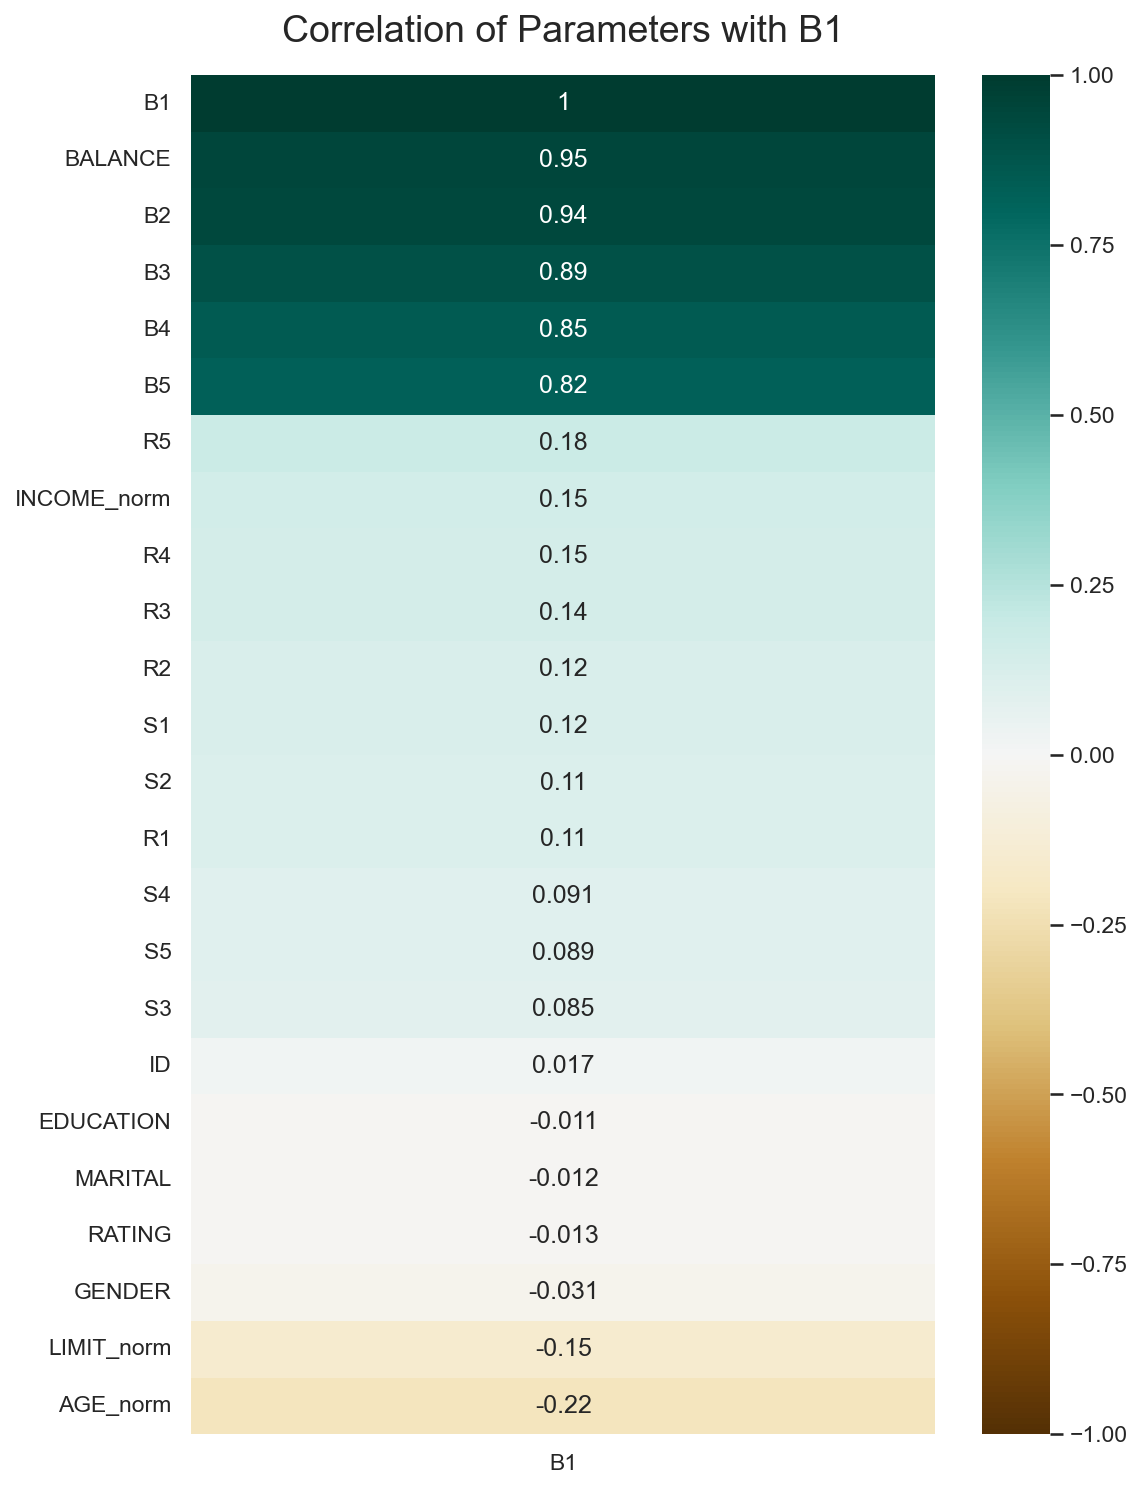

In [444]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_final.corr()[['B1']].sort_values(by='B1', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation of Parameters with B1', fontdict={'fontsize':18}, pad=16)


Hence, we can choose the best 5 parameters as the one's who are more correlated: Balance(0.95), B2(0.94) , B3(0.89), B4(0.85), B5(0.82). We choose 5 parameters instead of all of them to make the model simpler and avoid overfitting. We see a substantial decrease in correlation between Rn & Bn etc. Hence we choose the best variables to predict B1.

In [445]:
df = df_final.filter(['BALANCE', 'B1', 'B2', 'B3', 'B4','B5'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,18586.0,9084.147689,12957.461534,0.0,646.1875,3961.7375,11943.75,130692.45
B1,18586.0,49770.899279,71401.977137,-69777.0,3100.2500,21399.5000,64909.25,743970.00
B2,18586.0,47970.432476,69820.621530,-157264.0,2874.7500,20414.0000,61744.75,855086.00
B3,18586.0,44822.299419,65584.255412,-65167.0,2538.5000,19502.0000,57450.50,706864.00
B4,18586.0,40867.991176,61213.398868,-81334.0,1957.2500,18350.0000,50686.75,823540.00
B5,18586.0,39433.595825,59440.091846,-209051.0,1440.2500,17391.0000,49704.75,514975.00


## *4. Test-Train split*

In [446]:
#Do the Test Train split
x = df.drop(['B1'],axis=1).values
y = df['B1'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state= 1)

## Now that preprocessing is done for linear regression, Let's start the linear regression model:

In [447]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

##  **Question 5: State the linear regression equation and explain key insights from the results obtained in Question 4.**

In [448]:
print(linreg.intercept_)
print(linreg.coef_)

189.15668068381638
[3.00660406 0.3901587  0.03813009 0.00946874 0.03547799]


#### Hence, We get the linear regression equation obtained from learning the dataset as
##### Y = 189.15668068381638 + 3.00660406 * x1(BALANCE) + 0.3901587 * x2(B2) + 0.03813009 * x3(B3) + 0.00946874 * x4(B4) + 0.03547799 * x5(B5)

The key insights from the results obtained are that we get a very good estimate through linear regression of  the dependable variable 'B1', Using the parameter values of 'BALANCE', 'B2', 'B3', 'B4', 'B5'. We can also use other parameters but because these 5 parameters are highly correlated providing a very good estimate, we prefer to keep the model simple to avoid overfitting. We can note key insights such as the fact that the 'Customer current credit balance' in his account impacts directly and substantially on the 'Customer billable amount in 1st month'. While 'B2', 'B3', 'B4', 'B5' have an effect on 'B1' as well but its not that significant. This is quite interesting to note.

In [449]:
y_pred = linreg.predict(x_test)
from sklearn.metrics import r2_score
Accuracy = r2_score(y_test,y_pred)*100
print(" Accuracy of the model based on r2_score is %.2f" %Accuracy)

 Accuracy of the model based on r2_score is 94.36


#### _**r_2 Score:**_ It is a percentage of the dependent variable's variance that can be predicted from the independent variables in this situation. It demonstrates the consistency between the Target's actual values and its expected values (Y). This regression model's high value indicates a high amount of correlated, which indicates that the dependable variable can be predicted reliably.